## Random directions (python version)

## Setup

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
# For 3D plots:
from mpl_toolkits.mplot3d import Axes3D

In [2]:
# Variables
# Make this many points...
M = 100
# ... at this distance from the origin:
radius = 1
# And set this random seed for repeatability:
random_seed = 42

## 2D

Generate points on a ring:
1. from the rand() function
2. by sampling the normal distribution

### Random

In [3]:
# Set random seed
np.random.seed(random_seed)
# Define angles from -180 to 180 deg:
azi_random = np.pi - (2 * np.pi * np.random.rand(M))

# Find the shifts from the origin.
x_random_2D = radius * np.cos(azi_random)
y_random_2D = radius * np.sin(azi_random)

### Normal

In [4]:
# Set random seed
np.random.seed(random_seed)

# Put the vectors in here:
vector_normal_2D_list = []
for i in range(M):
    # Define random vector:
    vector_normal_2D = np.random.normal(size=2)
    # Divide by its norm (a.k.a. magnitude):
    vector_normal_2D /= np.linalg.norm(vector_normal_2D)
    # Add it to the list:
    vector_normal_2D_list.append(vector_normal_2D)

# Convert to a sliceable matrix by splatting (...) and then
# h-concatenating the result:
vector_normal_2D_array = np.stack(vector_normal_2D_list, axis=-1)

Convert to azimuthal angles for comparison with the random points

In [5]:
azi_normal = np.arctan2(
    vector_normal_2D_array[1, :],
    vector_normal_2D_array[0, :]
)

## Plot

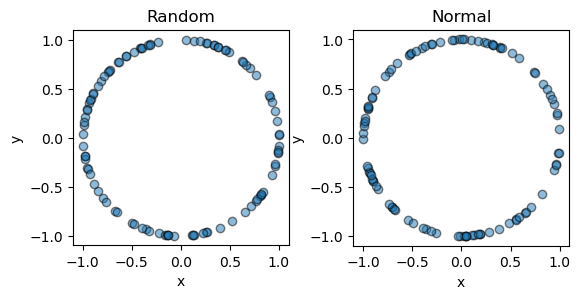

In [6]:
fig, axs = plt.subplots(1, 2, gridspec_kw={'wspace':0.3})

ax_random = axs[0]
ax_normal = axs[1]

# Random points:
ax_random.scatter(x_random_2D, y_random_2D,
                  alpha=0.5, edgecolor='k')
ax_random.set_title('Random')

# Normal points
ax_normal.scatter(vector_normal_2D_array[0, :], vector_normal_2D_array[1, :],
                  alpha=0.5, edgecolor='k')
ax_normal.set_title('Normal')

for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_aspect('equal')

plt.show()

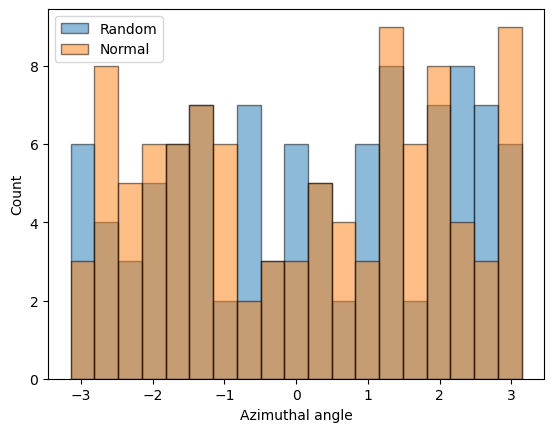

In [7]:
fig, ax = plt.subplots()

bins = np.linspace(-np.pi, np.pi, 20)

ax.hist(azi_random, bins=bins, label='Random',
        edgecolor='k', alpha=0.5)
ax.hist(azi_normal, bins=bins, label='Normal',
        edgecolor='k', alpha=0.5)

ax.set_xlabel('Azimuthal angle')
ax.set_ylabel('Count')
ax.legend()

plt.show()

## 3D 

Generate points on a sphere:
1. from the rand() function
2. by sampling the normal distribution

### Random

Can use the same azimuthal angles as earlier, but not the same x and y coordinates exactly as they all had z=0. Now need to generate new altitude angles and then re-normalise to make sure the resulting vector has a length of `radius`.

In [8]:
# Set random seed
# (different from the azi angle random seed otherwise get 
# weird results - points are too ordered)
np.random.seed(random_seed + 1)

# Generate altitude angles
# ranging from -90 to +90 degrees:
alt_random = (0.5 * np.pi) - (np.pi * np.random.rand(M))

# Convert these to z coordinates using trigonometry:
z_random_3D = radius * np.sin(alt_random)

# Calculate the projected length of the `radius` line in the x-y plane:
radius_xy = radius * np.cos(alt_random)

# Calculate new x, y coordinates using the same azimuthal angles
# as in the 2D case:
x_random_3D = radius_xy * np.cos(azi_random)
y_random_3D = radius_xy * np.sin(azi_random)

# Combine x, y, and z into one array:
vector_random_3D_array = np.stack([x_random_3D, y_random_3D, z_random_3D])

In [9]:
# Check the magnitude (a.k.a. norm, length) of these vectors:
mags_random_3D_array = []
for i in range(1, M):
    mags_random_3D = np.linalg.norm(vector_random_3D_array[:, i])
    mags_random_3D_array.append(mags_random_3D)

np.all(np.round(mags_random_3D_array, 7) == 1.0)

True

## Normal

In [10]:
# Set random seed
np.random.seed(random_seed)

# Put the vectors in here:
vector_normal_3D_list = []
for i in range(M):
    # Define random vector:
    vector_normal_3D = np.random.normal(size=3)
    # Divide by its norm (a.k.a. magnitude):
    vector_normal_3D /= np.linalg.norm(vector_normal_3D)
    # Multiply by the required radius:
    vector_normal_3D *= radius
    # Add it to the list:
    vector_normal_3D_list.append(vector_normal_3D)

# Convert to a sliceable matrix by splatting (...) and then
# h-concatenating the result:
vector_normal_3D_array = np.transpose(np.stack(vector_normal_3D_list))

Convert the points to alt/az for comparison with the random set

In [11]:
# Altitudes:
alt_normal = np.arcsin(vector_normal_3D_array[2, :] / radius)
# Azimuths:
azi_normal_3D = np.arctan2(
        vector_normal_3D_array[1, :], vector_normal_3D_array[0, :]
    )

### Plot

In [12]:
axis_limit = 1.1

viewing_angle = "default"

In [13]:
if viewing_angle == "view_xy":
    view_az = 90
    view_alt = 90
elif viewing_angle == "view_xz":
    view_az = 0
    view_alt = 0
elif viewing_angle == "view_yz":
    view_az = 90
    view_alt = 0
elif viewing_angle == "default":
    view_az = 60
    view_alt = 30
else:
    view_az = None
    view_alt = None

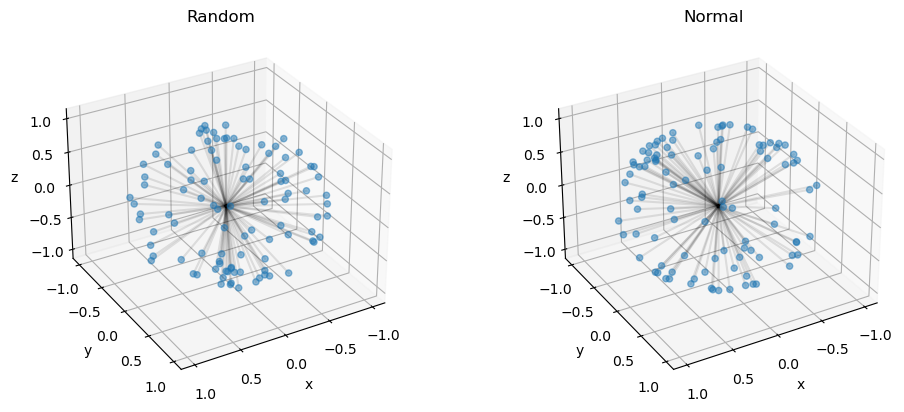

In [14]:
fig = plt.figure(figsize=(18,16))

ax_random = fig.add_subplot(331, projection='3d')
ax_normal = fig.add_subplot(332, projection='3d')

ax_random.scatter(
    x_random_3D,
    y_random_3D,
    z_random_3D,
    alpha=0.5
    )
# Draw connecting lines:
for i in range(M):
    ax_random.plot(
        [x_random_3D[i], 0],
        [y_random_3D[i], 0],
        [z_random_3D[i], 0],
        color='k',
        alpha=0.1
    )
ax_random.set_title('Random')

ax_normal.scatter(
    vector_normal_3D_array[0, :],
    vector_normal_3D_array[1, :],
    vector_normal_3D_array[2, :],
    alpha=0.5
    )
# Draw connecting lines:
for i in range(M):
    ax_normal.plot(
        [vector_normal_3D_array[0, i], 0],
        [vector_normal_3D_array[1, i], 0],
        [vector_normal_3D_array[2, i], 0],
        color='k',
        alpha=0.1
    )
ax_normal.set_title('Normal')

for ax in [ax_random, ax_normal]:
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_xlim(-axis_limit, axis_limit)
    ax.set_ylim(-axis_limit, axis_limit)
    ax.set_zlim(-axis_limit, axis_limit)
    ax.view_init(elev=view_alt, azim=view_az)

plt.show()

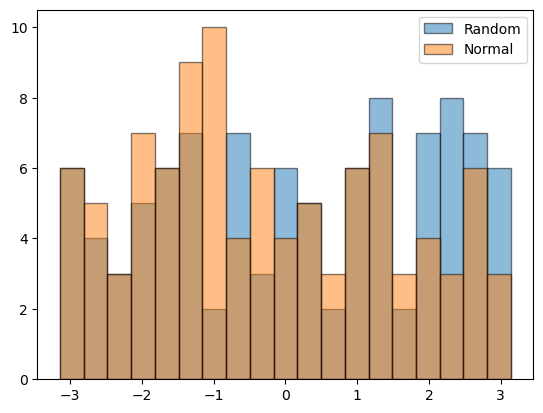

In [15]:
fig, ax = plt.subplots()

ax.hist(
    azi_random,
    bins=bins,
    label="Random",
    edgecolor='k',
    alpha=0.5
    )
ax.hist(
    azi_normal_3D,
    bins=bins,
    label="Normal",
    edgecolor='k',
    alpha=0.5
    )
ax.legend()
plt.show()

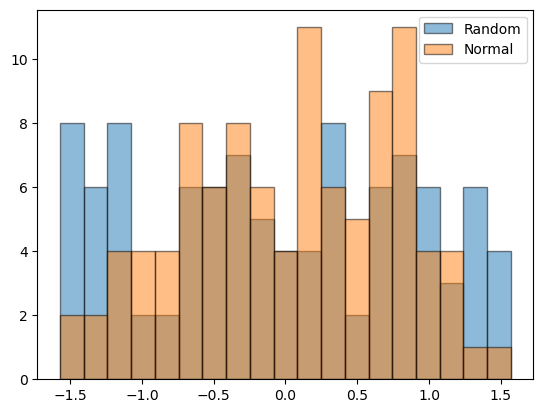

In [16]:
bins_alt = np.linspace(-np.pi*0.5, np.pi*0.5, 20)

fig, ax = plt.subplots()
ax.hist(
    alt_random,
    bins=bins_alt,
    label="Random", 
    # color="blue",  # false for transparency
    edgecolor='k',
    alpha=0.5
    )
ax.hist(
    alt_normal,
    bins=bins_alt,
    label="Normal",
    # color="orange",
    edgecolor='k',
    alpha=0.5
)

ax.legend()
# plt.savefig('alt_for_1000_points.png')
plt.show()

For 1000 data points, the above graph looks like the following (static .png):

![](alt_for_1000_points.png)

## Why does altitude need a normal distribution?

Changing the altitude angle affects the value of the z-coordinate. The size of that change depends on the starting altitude angle. 

The plot below shows the resulting change in z (y-axis) for a fixed change in altitude angle of 1 degree, where that change is applied to various starting altitudes (x-axis).

In [17]:
dphi_deg = 1.0
dphi = (dphi_deg / 180.0) * np.pi  # Convert to radians
phi_list = np.linspace(-np.pi*0.5, np.pi*0.5, 180)
dz_list = np.sin(phi_list + dphi) - np.sin(phi_list)

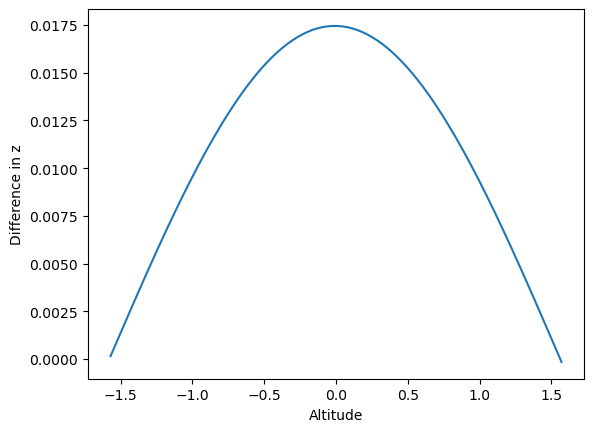

In [18]:
plt.plot(phi_list, dz_list)
plt.xlabel("Altitude")
plt.ylabel("Difference in z")
plt.show()

On a sphere, the change in z is large near the equator and small near the poles.

![](altitude_with_change_in_z.png)

We want our final points to be evenly-distributed in z, not in altitude angle. To ensure that, we need lots of altitude angles that are small (near zero) so that the starting point at z=0 samples a lot of points near z=0. We don't need as many large altitude angles as all of those values will bunch up at the poles.